# Datenvisualisierung mit matplotlib

In [1]:
from matplotlib import pyplot as plt
from pandas import read_csv
from numpy import mean, max, min, std

## Daten Laden

In [2]:
data = read_csv("diamonds.csv", sep=",")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print(data["carat"].values)
print(data["carat"].name)
print(data["carat"].index)
print(data["carat"].dtype)

[0.23 0.21 0.23 ... 0.7  0.86 0.75]
carat
RangeIndex(start=0, stop=53940, step=1)
float64


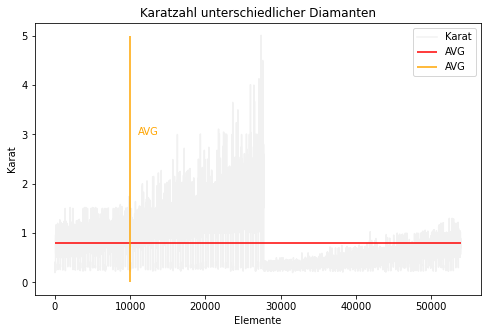

In [5]:
plt.figure(figsize=(8, 5))

plt.plot(
    data["carat"],
    color="lightgrey",
    label="Karat",
    alpha=0.3
)

plt.hlines(
    y=mean(data["carat"]),
    xmin=0,
    xmax=len(data["carat"]),
    color="r",
    label="AVG"
)

plt.vlines(
    x=10000,
    ymin=0,
    ymax=5,
    color="orange",
    label="AVG"
)

plt.text(
    x=11000,
    y=3,
    s="AVG",
    color="orange"
)

plt.legend(loc=0)

plt.title("Karatzahl unterschiedlicher Diamanten")
plt.xlabel("Elemente")
plt.ylabel("Karat")
plt.savefig("Mein_Testplot.jpg")
plt.show()